# Importing the Dataset and Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Dhar\Downloads\Python_Projects\superstore_data.csv", encoding = 'latin-1')
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [114]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Exploring the Dataset

In [3]:
df.shape

(9994, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
pd.isnull(df).sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Creating New Columns from the Date Columns

In [82]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Order Date'])


df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day'] = df['Order Date'].dt.dayofweek

# Visualizing the Data 

<function matplotlib.pyplot.show(close=None, block=None)>

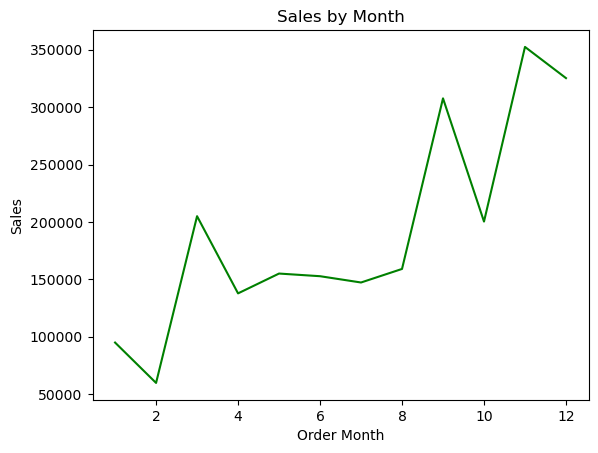

In [83]:
sales_by_month = df.groupby('Order Month')['Sales'].sum()


plt.plot(sales_by_month, color = 'green')
plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

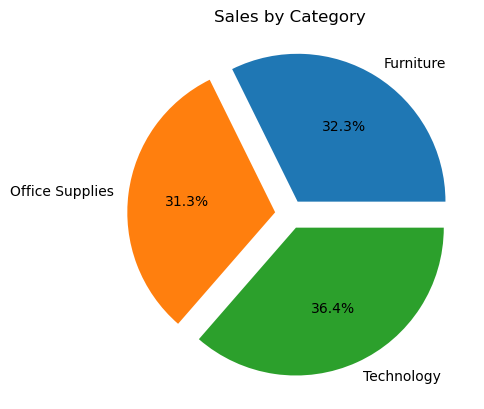

In [84]:
sales_by_category = df.groupby('Category')['Sales'].sum()
label = ['Furniture', 'Office Supplies', 'Technology']
explode = [0.1, 0.1, 0.1]

plt.pie(sales_by_category, labels = label, autopct = '%1.1f%%', explode = explode)
plt.title('Sales by Category')
plt.show

<Axes: title={'center': 'Sales by Sub_Category'}, xlabel='Sub-Category', ylabel='Sales'>

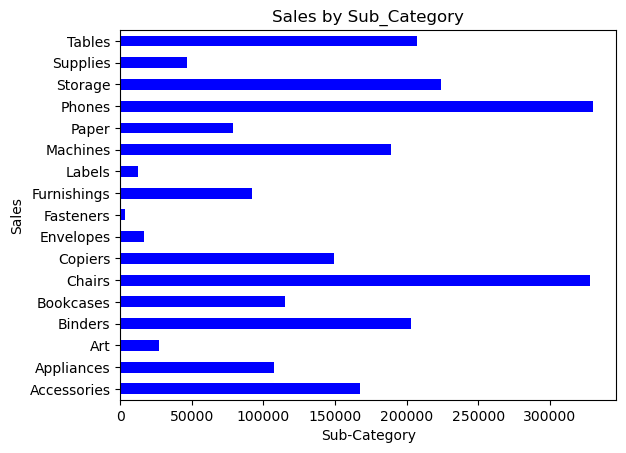

In [119]:
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum()


sales_by_subcategory.plot(kind = 'barh', color = 'blue', xlabel = 'Sub-Category', 
                          ylabel = 'Sales', title = 'Sales by Sub_Category')

<function matplotlib.pyplot.show(close=None, block=None)>

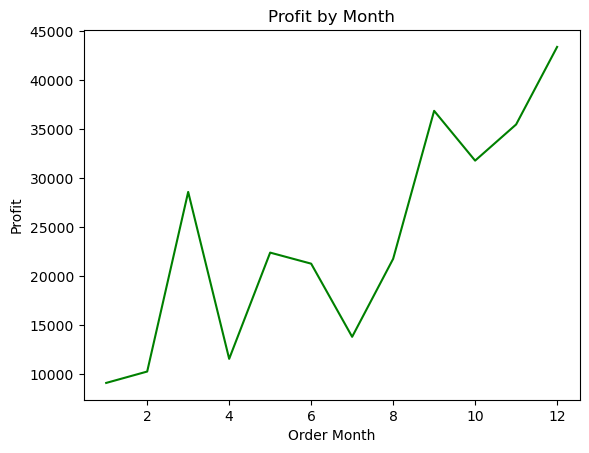

In [86]:
profit_by_month = df.groupby('Order Month')['Profit'].sum()


plt.plot(profit_by_month, color = 'green')
plt.xlabel('Order Month')
plt.ylabel('Profit')
plt.title('Profit by Month')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

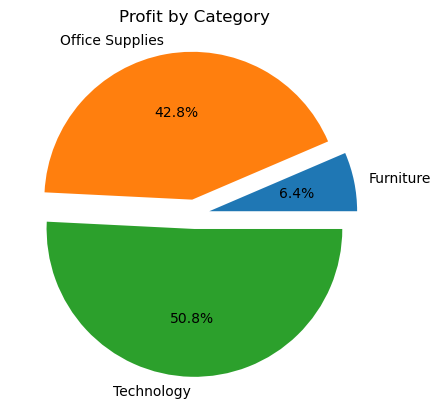

In [87]:
profit_by_category = df.groupby('Category')['Profit'].sum()
label = ['Furniture', 'Office Supplies', 'Technology']
explode = [0.1, 0.1, 0.1]

plt.pie(profit_by_category, labels = label, autopct = '%1.1f%%', explode = explode)
plt.title('Profit by Category')
plt.show

<Axes: title={'center': 'Profit by Sub_Category'}, xlabel='Sub-Category', ylabel='Profit'>

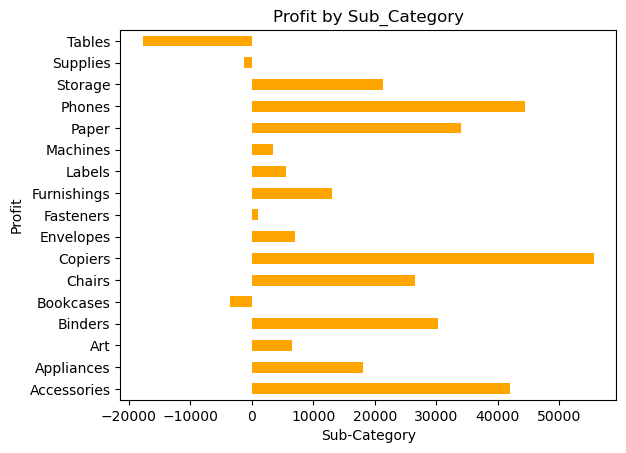

In [118]:
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum()



profit_by_subcategory.plot(kind = 'barh', color = 'orange', xlabel = 'Sub-Category', 
                          ylabel = 'Profit', title = 'Profit by Sub_Category')

<Axes: ylabel='Segment'>

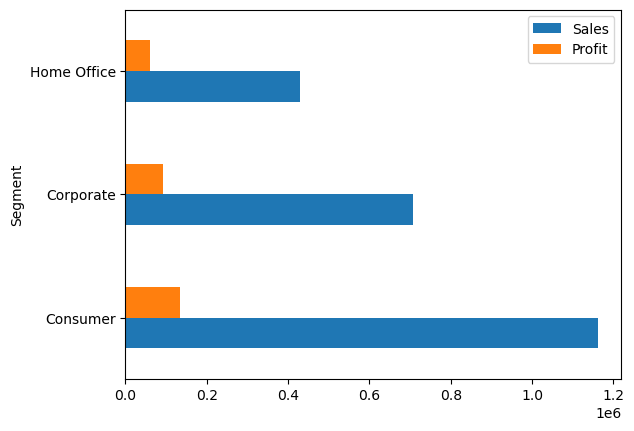

In [125]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales' : 'sum', 'Profit' : 'sum'})


sales_profit_by_segment.plot(kind = 'barh')

In [128]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales' : 'sum', 'Profit' : 'sum'})

sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']

sales_profit_by_segment

,Sales,Profit,Sales_to_Profit_Ratio
Segment,,,
Consumer,1161401.34,134119.21,8.66
Corporate,706146.37,91979.13,7.68
Home Office,429653.15,60298.68,7.13
